<font size = 1 color="gray">Introducción a la computación numérica y simbólica con Python</font>  

<img src="img/logo-vector-u-tad.jpg" align="left" >

# 3. Derivación numérica e interpolación



## Derivación

En esta sección se describe la derivación numérica, en otra lección posterior se verá como usar la derivación simbólica. 

La idea básica consiste en aproximar la operación de derivación por la diferencia en pequeños intervalos. Es decir partimos del límite:

$ f^{\prime }(x)=\lim _{h\to 0}{\frac {f(x+h)-f(x)}{h}}$

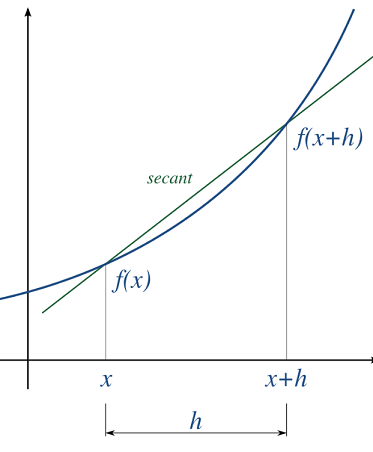

Y lo sustituimos por:
 
$ f^{\prime }(x_{0})\approx {\frac {f(x_{0}+h)-f(x_{0})}{h}}$

Esta es la forma más simple, llamada diferencias hacia adelante. También podríamos tomar la diferencia hacia atrás:

$ f^{\prime }(x_{0})\approx {\frac {f(x_{0})-f(x_{0}-h)}{h}}$

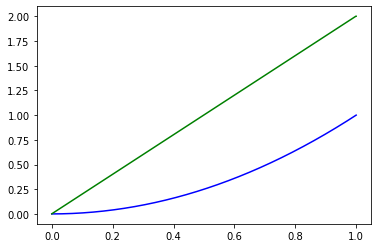

In [3]:
# Cálculo de la derivada mediante diferencias hacia adelante

import numpy as np
import matplotlib.pyplot as plt

def deriv_difdelante(y, h):
    N = len(y)
    deriv = np.zeros(N-1)
    deriv = [(y[k+1] - y[k])/h for k in range(N-1)]
    return deriv

npunt = 1000
x = np.linspace(0,1,npunt)
y = x**2
h=1/npunt
dy = deriv_difdelante(y,h)
plt.plot(x,y,color="blue",label="función")
# Para poder imprimir las dos gráficas, el número de puntos debe ser igual, pero no tenemos la
# derivada en el último punto. Para solucionarlo repetimos el último valos de dy
dy.append(dy[-1])
plt.plot(x,dy,color="green",label="derivada")

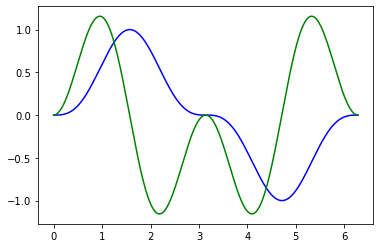

In [4]:
# Veamos otro ejemplo

npunt = 1000
x = np.linspace(0,2*np.pi,npunt)
y = np.sin(x)**3
h = 2*np.pi/npunt
dy = deriv_difdelante(y,h)
plt.plot(x,y,color="blue",label="función")
dy.append(dy[-1])
plt.plot(x,dy,color="green",label="derivada")

Normalmente se trabaja con el valor medio de las diferencias hacia adelante y hacia atrás:
    

$ f^{\prime }(x_{0})\approx {\frac {f(x_{0}+h)-f(x_{0}-h)}{2h}}$

O con la extrapolación de Richardson que genera errores más pequeños y cuyo desarrollo no se hará en este curso introductorio.

## Numpy gradient

Numpy ofrece la función gradient que utiliza diferencias centrales. 

In [5]:
# Para el mismo ejemplo anterior. Gradient devuelve el valor normalizado, si queremos la derivada hay
# que multiplicar por 1/h

dygrad = (1/h)*np.gradient(y)

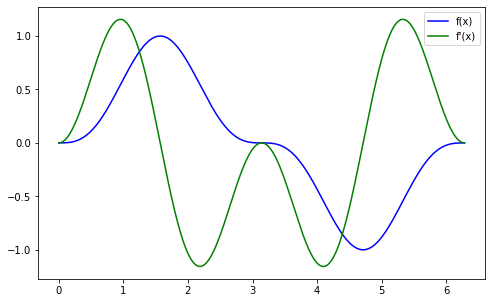

In [6]:
plt.figure(figsize=(8,5))
plt.plot(x,y,color="blue",label="f(x)")
plt.plot(x,dygrad,color="green",label="f'(x)")
plt.legend()

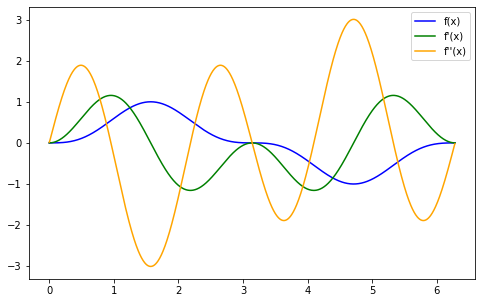

In [7]:
## De la misma forma podemos obtener la segunda derivada de la función
dy2grad = (1/h)*np.gradient(dygrad)
plt.figure(figsize=(8,5))
plt.plot(x,y,color="blue",label="f(x)")
plt.plot(x,dygrad,color="green",label="f'(x)")
plt.plot(x,dy2grad,color="orange",label="f''(x)")
plt.legend()

## Interpolación

La interpolación resulta útil por sí misma y porque es un paso intermedio para resolver otros problemas. Así, como se explica en la siguiente lección, la integración por el método de Simpson se basa en aproximar la función en intervalos muy pequeños por polinomios de segundo grado.

En este apartado no vamos a desarrollar funciones sino que usaremos `interpolate` del paquete SciPy.



[ 0.33333333  0.70275537  0.69141622  0.46117677 -0.80530251 -1.23861478
  0.00186915  0.70256567  0.67013842  0.63222405]


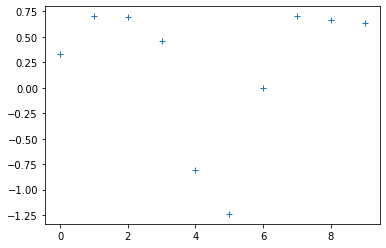

In [8]:
from scipy import interpolate

# Partimos de un conjunto de puntos de una función arbitraria

x = np.linspace(0,9,10)
y = np.sin(x)+(1/3)*np.cos(2*x)

print(y)

plt.plot(x,y,'+')

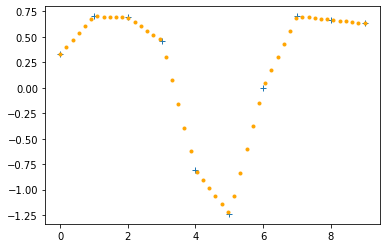

In [9]:
xinterpolacion= np.linspace(0,9,50)             # Queremos interpolar la función en 50 puntos
yinterpoladas = np.interp(xinterpolacion, x, y)
plt.plot(x,y,'+')
plt.plot(xinterpolacion,yinterpoladas,'.',color='orange')

La solución no parece muy satisfactoria porque `interp` lleva a cabo una interpolación lineal. Vamos a probar con otras funciones más potentes del módulo `scipy.interpolate`.

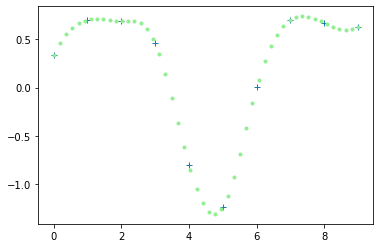

In [10]:
from scipy.interpolate import interp1d
fcubica = interp1d(x, y, kind='cubic')               # Interpolación con un polinomio de grado 3. Devuelve una función
y3interpoladas = fcubica(xinterpolacion) 
plt.plot(x,y,'+')
plt.plot(xinterpolacion,y3interpoladas,'.',color='lightgreen')

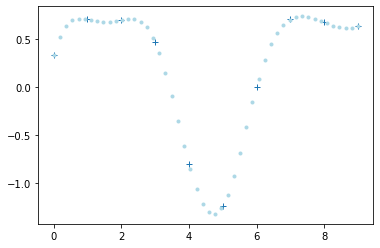

In [11]:
# Interpolación con spline, que es como un polinomio suavizado

s = interpolate.InterpolatedUnivariateSpline(x, y, k=4)
yspline = s(xinterpolacion)
plt.plot(x,y,'+')
plt.plot(xinterpolacion,yspline,'.',color='lightblue')

Error cuadrático medio lineal 0.012913204
Error cuadrático medio cúbica 0.0049311399
Error cuadrático medio spline k4 0.0037978


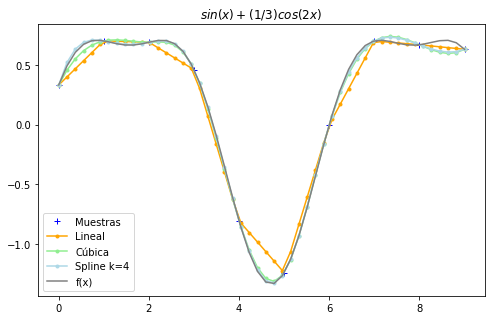

In [12]:
# Finalmente representamos la función y las interpolaciones en la misma gráfica
plt.figure(figsize=(8,5))

yfuncion = np.sin(xinterpolacion)+(1/3)*np.cos(2*xinterpolacion)
plt.plot(x,y,'+',color="blue",label="Muestras")
plt.plot(xinterpolacion,yinterpoladas,'.-',color='orange',label="Lineal")
plt.plot(xinterpolacion,y3interpoladas,'.-',color='lightgreen',label="Cúbica")
plt.plot(xinterpolacion,yspline,'.-',color='lightblue',label="Spline k=4")
plt.plot(xinterpolacion,yfuncion,'-',color='grey',label="f(x)")
plt.title('$sin(x)+(1/3)cos(2x)$')
plt.legend()

def calcRMSE(y,yaprox):
    return(1/len(y))*np.sqrt(np.sum(np.abs(y-yaprox)**2))

print("Error cuadrático medio lineal {:.8}".format(calcRMSE(yfuncion,yinterpoladas)))
print("Error cuadrático medio cúbica {:.8}".format(calcRMSE(yfuncion,y3interpoladas)))
print("Error cuadrático medio spline k4 {:.8}".format(calcRMSE(yfuncion,yspline)))

La función `interpolate` ofrece más opciones interesantes, como polinomios de Lagrange o la aproximación por serie de Taylor. Recordemos esta útlima. Sea $f(x)$ una función infinitamente diferenciable en el entorno de $a, a \in \mathbb{R}$. La aproximación polinómica de Taylor es:

$f(x) = f(a)+\frac {f'(a)}{1!} (x-a)+ \frac{f''(a)}{2!} (x-a)^2+\frac{f'''(a)}{3!}(x-a)^3+ \cdots$ que se puede escribir de forma compacta como  $f(x) = \sum_{n=0} ^ {\infty} \frac {f^{(n)}(a)}{n!} (x-a)^{n}$

Si nos quedamos solo con el primer término en $x$, es una aproximación lineal.

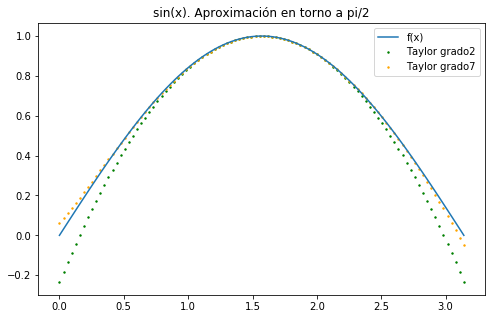

In [13]:
from scipy.interpolate import approximate_taylor_polynomial
npuntos = 100
x = np.linspace(0,np.pi,npuntos)
y = np.sin(x)
a = np.pi/2
grado = 2
xaprox = np.linspace(-a,a,npuntos)
ptaylor = approximate_taylor_polynomial(np.sin, a, grado, 0.01)
plt.figure(figsize=(8,5))
plt.scatter(xaprox+a,ptaylor(xaprox),s=2,label="Taylor grado"+str(grado),color="green")
grado = 7
ptaylor = approximate_taylor_polynomial(np.sin, a, grado, 0.01)
plt.scatter(xaprox+a,ptaylor(xaprox),s=2,label="Taylor grado"+str(grado),color="orange")
plt.plot(x,y,label="f(x)")
plt.title("sin(x). Aproximación en torno a pi/2")
plt.legend()

---

<font size="1" color="grey">
    (c) 2020 Javier García Algarra. <a href='https://www.u-tad.com'>www.u-tad.com</a> <br>
Licensed under a Creative Commons Reconocimiento 4.0 Internacional License
</font> 